In [1]:
import os
import sys
import glob
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (22,8)
np.random.seed(30)
sns.set_theme(style="darkgrid")
warnings.filterwarnings('ignore')

In [2]:
#path = r"./data/air_quality"
#allFiles = glob.glob(path+ "/*.csv")

#lst = []
#for f in allFiles:
#    df = pd.read_csv(f, index_col=None, header=0)
#    lst.append(df)
    
#df = pd.concat(lst)
#cols = ['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP',
#       'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station']
#df = df[cols]
#df = df.sort_values(['station', 'year'])

#df.to_csv("./data/air-quality-index.csv")
df = pd.read_csv("./data/air-quality-index.csv")
df.tail(3)

,Unnamed: 0,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
420765,35061,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,54.0,10.8,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong
420766,35062,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,59.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong
420767,35063,35064,2017,2,28,23,13.0,19.0,4.0,38.0,600.0,49.0,8.6,1014.1,-15.9,0.0,NNE,1.3,Wanshouxigong


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  420768 non-null  int64  
 1   No          420768 non-null  int64  
 2   year        420768 non-null  int64  
 3   month       420768 non-null  int64  
 4   day         420768 non-null  int64  
 5   hour        420768 non-null  int64  
 6   PM2.5       412029 non-null  float64
 7   PM10        414319 non-null  float64
 8   SO2         411747 non-null  float64
 9   NO2         408652 non-null  float64
 10  CO          400067 non-null  float64
 11  O3          407491 non-null  float64
 12  TEMP        420370 non-null  float64
 13  PRES        420375 non-null  float64
 14  DEWP        420365 non-null  float64
 15  RAIN        420378 non-null  float64
 16  wd          418946 non-null  object 
 17  WSPM        420450 non-null  float64
 18  station     420768 non-null  object 
dtypes:

In [4]:
df.describe()

,Unnamed: 0,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17531.500000,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,0.000000,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8765.750000,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17531.500000,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26297.250000,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35063.000000,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [5]:
missing_value = df.isnull().sum()
missing_value

Unnamed: 0        0
No                0
year              0
month             0
day               0
hour              0
PM2.5          8739
PM10           6449
SO2            9021
NO2           12116
CO            20701
O3            13277
TEMP            398
PRES            393
DEWP            403
RAIN            390
wd             1822
WSPM            318
station           0
dtype: int64

In [6]:
total_cells = np.product(df.shape)
total_missing_value = missing_value.sum()

missing_percentage = (total_missing_value/total_cells) * 100
missing_percentage

0.925963451293074

In [7]:
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['PM10'].fillna(df['PM10'].median(), inplace=True)
df['SO2'].fillna(df['SO2'].median(), inplace=True)
df['NO2'].fillna(df['NO2'].mean(), inplace=True)
df['CO'].fillna(df['CO'].median(), inplace=True)
df['O3'].fillna(df['O3'].median(), inplace=True)
df['TEMP'].fillna(df['TEMP'].median(), inplace=True)
df['PRES'].fillna(df['PRES'].median(), inplace=True)
df['DEWP'].fillna(df['DEWP'].median(), inplace=True)
df['RAIN'].fillna(df['RAIN'].median(), inplace=True)
df['WSPM'].fillna(df['WSPM'].median(), inplace=True)
df['wd'].fillna(method='ffill', inplace=True)

In [8]:
df.sample(5)

,Unnamed: 0,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
2358,2358,2359,2013,6,7,6,115.0,120.0,5.0,60.0,1800.0,4.0,20.4,1002.5,18.9,0.0,E,1.0,Aotizhongxin
185972,10652,10653,2014,5,18,20,172.0,349.0,38.0,82.0,1600.0,184.0,26.8,998.7,14.9,0.0,SW,1.6,Gucheng
139671,34479,34480,2017,2,4,15,324.0,399.0,52.0,114.0,3600.0,35.0,9.1,1011.3,-7.6,0.0,SSW,1.2,Dongsi
95439,25311,25312,2016,1,19,15,40.0,50.0,20.0,29.0,800.0,56.0,0.1,1019.5,-23.6,0.0,W,3.6,Dingling
278170,32722,32723,2016,11,23,10,27.0,49.0,17.0,51.0,1000.0,17.0,-0.5,1033.2,-14.8,0.0,WNW,1.4,Nongzhanguan


In [9]:
def plot_pollution(x, y):
    temp_df = df[[y, x, 'station']].groupby([x]).median().reset_index().sort_values(by=x,ascending=False)
    f,ax=plt.subplots(figsize=(15,5))
    sns.pointplot(x=x, y=y, data=temp_df, )

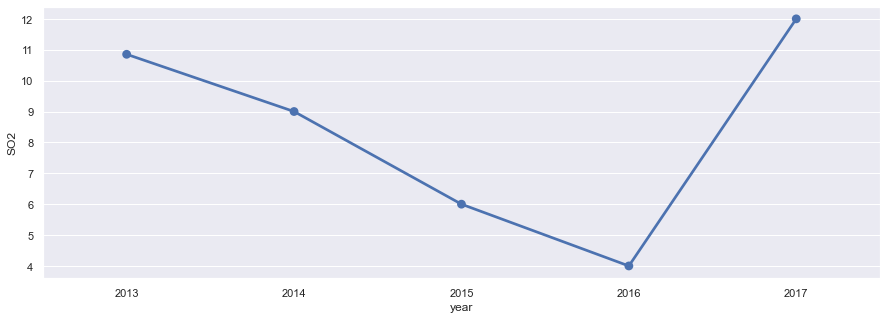

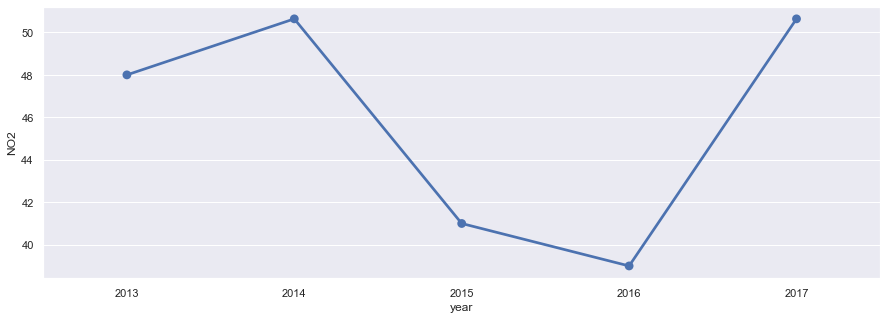

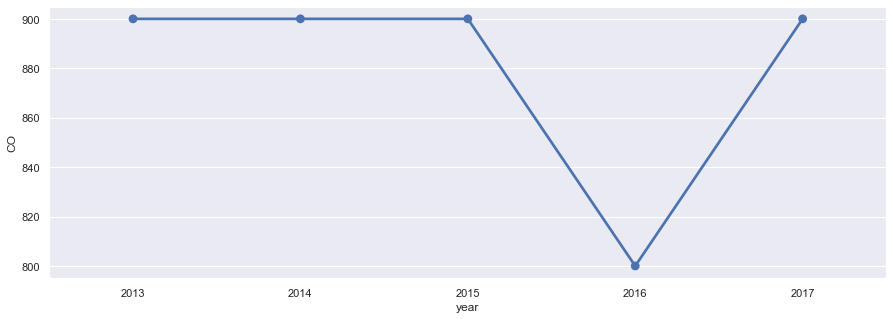

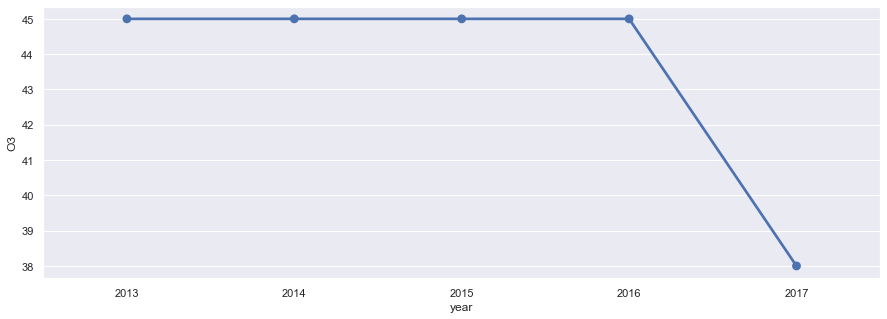

In [10]:
xs = ['SO2', 'NO2', 'CO', 'O3']
for x in xs:
    plot_pollution('year', x)
    

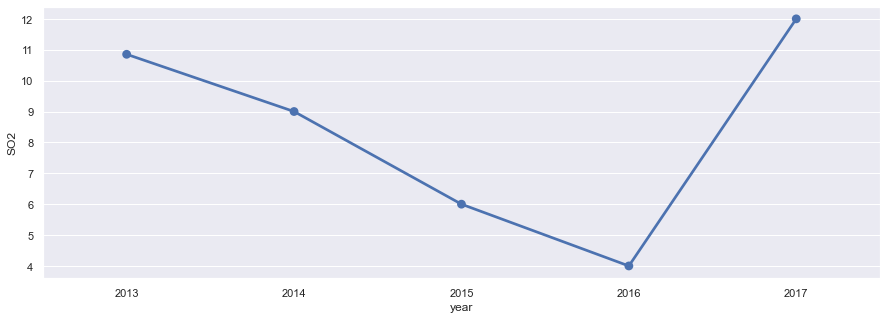

In [11]:
plot_pollution('year', 'SO2')

In [12]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_file("air-quality-index.html")

In [13]:
# Prepare train, test data
from sklearn.model_selection import train_test_split

X, y = df[['SO2', 'NO2','CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']], df['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(294537, 4) (126231, 4)
(294537,) (126231,)


In [14]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred

array([ 94.15539025, 156.29783469, 224.32888126, ...,  20.59569059,
        76.5338297 ,  89.76579196])

In [15]:
y = np.array(y_test)
yp = np.array(y_pred).flatten()
df = pd.DataFrame({"test": y, "predictions": yp})
df.sample(30)

,test,predictions
0,115.0,94.155390
1,172.0,156.297835
2,324.0,224.328881
3,40.0,46.638405
4,27.0,60.420241
...,...,...
95,70.0,103.436285
96,33.0,37.875423
97,32.0,44.836040
98,254.0,171.235817


In [17]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(4,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(19),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(2),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200)

Epoch 1/20
1473/1473 [==============================] - 3s 2ms/step - loss: 4191.2329 - accuracy: 0.0000e+00 - val_loss: 2340.6267 - val_accuracy: 0.0000e+00
Epoch 2/20
1473/1473 [==============================] - 3s 2ms/step - loss: 2481.7896 - accuracy: 0.0000e+00 - val_loss: 2298.9404 - val_accuracy: 0.0000e+00
Epoch 3/20
1473/1473 [==============================] - 3s 2ms/step - loss: 2408.2336 - accuracy: 0.0000e+00 - val_loss: 2185.9636 - val_accuracy: 0.0000e+00
Epoch 4/20
1473/1473 [==============================] - 3s 2ms/step - loss: 2373.0129 - accuracy: 0.0000e+00 - val_loss: 2177.1108 - val_accuracy: 0.0000e+00
Epoch 5/20
1473/1473 [==============================] - 3s 2ms/step - loss: 2345.7402 - accuracy: 0.0000e+00 - val_loss: 2145.4727 - val_accuracy: 0.0000e+00
Epoch 6/20
1473/1473 [==============================] - 3s 2ms/step - loss: 2341.9177 - accuracy: 0.0000e+00 - val_loss: 2130.5452 - val_accuracy: 0.0000e+00
Epoch 7/20
1473/1473 [==============================